In [1]:
import pandas as pd

#load csv and delete first 16 and last 10 rows
path= r"C:\Users\Nicola\Downloads\ITA_Malosco_PVGIS.csv"
df = pd.read_csv(path, header=16)
df = df[:-10]


#set the index
df['time(UTC)'] = pd.to_datetime(df['time(UTC)'],format='%Y%m%d:%H%M')
df.set_index('time(UTC)', inplace= True)
df.index.rename("Timestamp", inplace=True)

df

,T2m,RH,G(h),Gb(n),Gd(h),IR(h),WS10m,WD10m,SP
Timestamp,,,,,,,,,
2010-01-01 00:00:00,-2.36,86.70,0.0,-0.0,0.0,233.30,0.93,318.0,86990.0
2010-01-01 01:00:00,-2.44,87.04,0.0,-0.0,0.0,235.23,1.00,321.0,86932.0
2010-01-01 02:00:00,-2.52,87.39,0.0,-0.0,0.0,237.17,1.07,324.0,86873.0
2010-01-01 03:00:00,-2.61,87.73,0.0,-0.0,0.0,239.10,1.14,329.0,86829.0
2010-01-01 04:00:00,-2.69,88.07,0.0,-0.0,0.0,241.03,1.21,335.0,86786.0
...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,-1.94,84.98,0.0,-0.0,0.0,223.64,0.58,348.0,90764.0
2014-12-31 20:00:00,-2.03,85.33,0.0,-0.0,0.0,225.57,0.65,346.0,90799.0
2014-12-31 21:00:00,-2.11,85.67,0.0,-0.0,0.0,227.50,0.72,346.0,90796.0


In [2]:
#check legend

csv = pd.read_csv(path, header=16)
legend = pd.DataFrame(csv[-10:]['time(UTC)'])
legend.rename(columns={"time(UTC)": "Legend"}, inplace = True)
legend.reset_index(drop=True, inplace=True)

#to display non-truncated column data
pd.set_option('display.max_colwidth', None)

legend

,Legend
0,T2m: 2-m air temperature (degree Celsius)
1,RH: relative humidity (%)
2,G(h): Global irradiance on the horizontal plane (W/m2)
3,Gb(n): Beam/direct irradiance on a plane always normal to sun rays (W/m2)
4,Gd(h): Diffuse irradiance on the horizontal plane (W/m2)
5,IR(h): Surface infrared (thermal) irradiance on a horizontal plane (W/m2)
6,WS10m: 10-m total wind speed (m/s)
7,WD10m: 10-m wind direction (0 = N
8,SP: Surface (air) pressure (Pa)
9,PVGIS (c) European Communities


In [3]:
#select the specific data to compare. It may be that you have to change the year
df_try_weekly = df['2010-04-05':'2010-04-11']['T2m']

df_try_weekly.reset_index(drop=True, inplace=True)
df_try_weekly = df_try_weekly.astype(float)
df_try_weekly

0      4.35
1      4.14
2      3.93
3      3.73
4      3.53
       ... 
163    3.87
164    3.43
165    3.16
166    2.90
167    2.64
Name: T2m, Length: 168, dtype: float64

In [4]:
a = str('2020.04.05')
df_weekly = pd.read_csv("G:/Il mio Drive/MONITORAGGI/Fanti Renew-Wall/DATA/DATA "+ a +".csv")

#così mi riempe i buchi con NaN. Mi sistema già anche il formato dell'ora in 24h. Devo però inserire io la frequenza in resample
df_weekly["Timestamp"]= pd.to_datetime(df_weekly['Timestamp'])
df_ws_weekly = df_weekly.set_index('Timestamp').resample('H').asfreq()

index= df_ws_weekly.index

df_ws_weekly.reset_index(drop=True, inplace=True)
df_ws_weekly["TempM"]



0       2.520027
1       2.045475
2       1.663086
3       1.721916
4       1.274815
         ...    
163    16.637032
164    12.232700
165     9.483425
166     8.614716
167     8.018581
Name: TempM, Length: 168, dtype: float64

In [8]:
aa = pd.DataFrame(pd.concat([df_ws_weekly["TempM"], df_try_weekly], axis=1))

aa.set_index(index, inplace=True)
df_weekly = aa

# (aa['TempM']-aa['T2m']).mean()
# (aa['TempM']-aa['T2m']).plot()

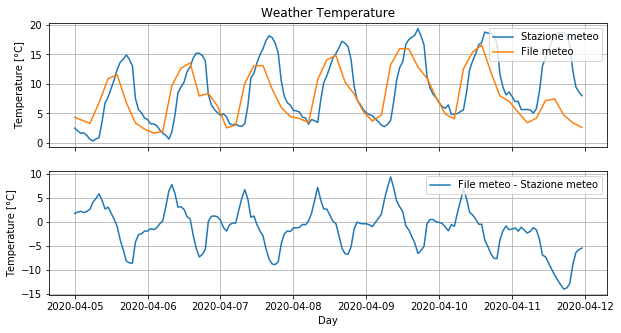

In [10]:
#creare più plot : https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html

import matplotlib.pyplot as plt
import datetime

%matplotlib inline

fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,5))
   
    
ax1.plot(df_weekly.index,df_weekly['TempM'], label="Stazione meteo")
ax1.plot(df_weekly.index,df_weekly['T2m'], label="File meteo")
ax1.legend(loc="upper right")

ax2.set_xlabel('Day')
ax1.set_ylabel('Temperature [°C]')
ax2.set_ylabel('Temperature [°C]')
ax1.set_title('Weather Temperature')


ax2.plot(df_weekly.index,(df_weekly['T2m']-df_weekly['TempM']), label ="File meteo - Stazione meteo")
ax2.legend(loc="upper right")

#griglia per più facile lettura
ax1.grid(axis= "both")
ax2.grid(axis= "both")


#impostare eventuali limiti agli assi
# plt.ylim([0,1000])

# fig.autofmt_xdate(rotation=90)

#savefig va sempre prima di show()

import os

if not os.path.isdir(r'C:\Users\Nicola\Desktop\STAMPE_Jupyter'):
    os.mkdir(r'C:\Users\Nicola\Desktop\STAMPE_Jupyter')


plt.savefig(r'C:\Users\Nicola\Desktop\STAMPE_Jupyter\weekly_File meteo - Stazione meteo.png', bbox_inches='tight', transparent = True, dpi= 300)
plt.show()

In [15]:
import pandas as pd

def write_to_html_file(df, title='', filename='out.html'):
    '''
    Write an entire dataframe to an HTML file with nice formatting.
    '''

    result = '''
<html>
<head>
<style>

    h2 {
        text-align: center;
        font-family: Helvetica, Arial, sans-serif;
    }
    table { 
        margin-left: 0;
        margin-right: 0;
    }
    table, th, td {
        border: 1px solid black;
        border-collapse: collapse;
    }
    th, td {
        padding: 5px;
        text-align: center;
        font-family: Helvetica, Arial, sans-serif;
        font-size: 90%;
    }
    table tbody tr:hover {
        background-color: #dddddd;
    }
    .wide {
        width: 35%; 
    }

</style>
</head>
<body>
    '''
    result += '<h2> %s </h2>\n' % title
    if type(df) == 'pandas.io.formats.style.Styler':
        result += df.render()
    else:
        result += df.to_html(classes='wide', escape=False)
    result += '''
</body>
</html>
'''
    with open(filename, 'w') as f:
        f.write(result)

In [16]:
# per stampare tabelle: formato dipende da cella sopra

import os

if not os.path.isdir(r'C:\Users\Nicola\Desktop\STAMPE_Jupyter'):
    os.mkdir(r'C:\Users\Nicola\Desktop\STAMPE_Jupyter')


#dataframe da stampare
to_stamp = pd.DataFrame(df_weekly['T2m']-df_weekly['TempM'], columns= ["File meteo - Stazione meteo"]).describe()



# costruire il file html della tabella secondo il formato della cella sopra (è stata definita la funzione write_to_html_file)
write_to_html_file(to_stamp, '', r'C:\Users\Nicola\Desktop\STAMPE_Jupyter\to_stamp.html')


# You can then use a package that converts html to an image. For example, IMGKit: Python library of HTML to IMG wrapper. Bear in mind that this solution requires the installation of wkhtmltopdf, a command line tool to render HTML into PDF and various image formats. It is all described in the IMGKit page.

import imgkit
#devi prima configurarlo e aggiungere sempre config=conf quando stampi. Sono diversi fra pdf e immagine

path_wkhtmltoimage = r'C:\Program Files\wkhtmltopdf\bin\wkhtmltoimage.exe'
confimg = imgkit.config(wkhtmltoimage=path_wkhtmltoimage)
path_wkhtmltopdf = 'C:\\Program Files\\wkhtmltopdf\\bin\\wkhtmltopdf.exe'
confpdf = imgkit.config(wkhtmltoimage=path_wkhtmltopdf)

# stampa
# imgkit.from_url("C:\\Users\\Nicola\\Desktop\\to_stamp.html", r'C:\Users\Nicola\Desktop\styled_df.png', config=confimg)

imgkit.from_url("C:\\Users\\Nicola\\Desktop\\STAMPE_Jupyter\\to_stamp.html", r'C:\Users\Nicola\Desktop\STAMPE_Jupyter\File meteo e stazione.pdf', config= confpdf)

to_stamp

Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


,File meteo - Stazione meteo
count,168.000000
mean,-1.225317
std,4.553105
min,-13.948206
25%,-3.720888
50%,-0.761934
75%,1.765232
max,9.441616
